In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


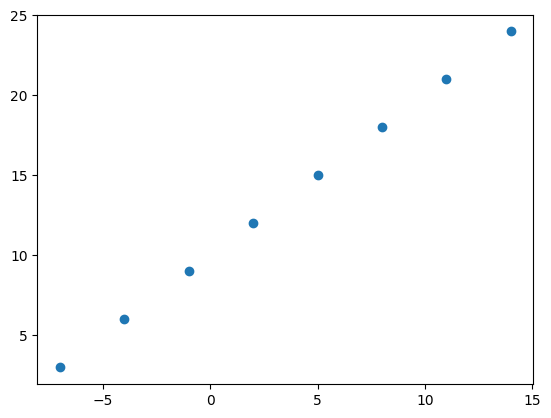

In [4]:


X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)

In [5]:
# Demo tensor for housing price pred

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

I0000 00:00:1739141846.997972    5111 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5564 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

### Steps in modeling in tensorflow
1. Create a Model - Define input and output layers. Along with hidden NN layers.
2. Compile model - Define Loss function, Optimizer, and evaluation metric.
3. Fit Model

In [10]:
tf.random.set_seed(42)


# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X,axis=-1),y, epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 15.4729 - mae: 15.4729
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 15.1916 - mae: 15.1916
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 14.9328 - mae: 14.9328
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 14.8003 - mae: 14.8003
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 14.6678 - mae: 14.6678
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 14.5353 - mae: 14.5353
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 14.4028 - mae: 14.4028
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.2703 - mae: 14.2703
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 14.1378 - mae: 14.1378
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 14.0053 - mae: 14.0053
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 13.8728 - mae: 13.8728
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 13.7403 - mae: 13.7403
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━

In [11]:
# Make a prediction

model.predict(np.array([17.], dtype=np.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[22.023054]], dtype=float32)

## Improving the model

1. **Create a model** -- Add more layers, increase number of hidden units (neurons) within hidden layer, change activation function on each label
2. **Compile Model**  -- Change optimization function or **learning rate** of the function
3. **Fitting model** -- Fit model for more **epochs** or on more data. 

In [ ]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model.fit(X.reshape(-1,1), y, epochs=100)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step - loss: 13.3330 - mae: 13.3330
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 12.4739 - mae: 12.4739
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 11.6050 - mae: 11.6050
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 10.7283 - mae: 10.7283
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 9.8365 - mae: 9.8365
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 8.9240 - mae: 8.9240
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.0018 - mae: 8.0018
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 7.2437 - mae: 7.2437
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 6.4533 - mae: 6.4533
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 5.6321 - mae: 5.6321
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 4.7755 - mae: 4.7755
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3.9751 - mae: 3.9751
Epoch 13/1000
1/1 ━━━━━━━━━━

In [86]:
model.predict(np.array([14.]))
# X,y

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[24.156385]], dtype=float32)

## Evaluating a model

- In pRactice, 
Build Model -> Fit it -> Evaluate it -> (Tweak <--> Fit) -> Evaluate (See above updating stuff like the optimizer to Adam from SGD, adding learning_rate, adding layers, epochs etc) ** AADJUSTING LEARNING_RATE IS THE MOST POWERFUL TOOL**

### Visualize
- The data  
- The model -- How does it look
- THe training -- Performance
- THe predictions -- how do preds of a model line up against the ground truth 

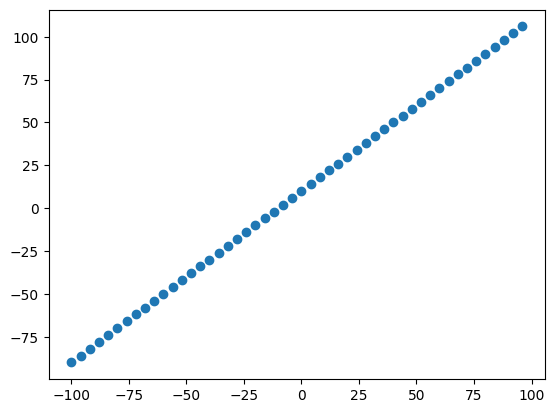

In [89]:
X = tf.range(-100, 100, 4)
y = X+10
plt.scatter(X,y)

### The 3 sets
- Split 80/20 Training